In [52]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, fisher_exact, f, t
import statsmodels.api as sm
import scipy.stats as ss

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [53]:
plt.style.use('ggplot')

In [54]:
x1 = np.array(norm(loc = 10.5, scale = 3.55).rvs(size = 80))
x2 = np.array(norm(loc = 2.3, scale = 10).rvs(size = 60))

## Пункт 2-4

In [55]:
x = np.sort(np.append(x1, x2))
print('Вариационный ряд: {0}'.format(x))

Вариационный ряд: [-19.90564322 -19.61196339 -13.93209834 -13.55759108 -11.80384252
  -7.7345218   -7.5371555   -7.3837638   -6.31289563  -5.55380709
  -5.22562154  -4.99325542  -4.71635995  -4.44544938  -2.7689045
  -2.6735855   -2.50839834  -2.4357723   -2.08572067  -1.65076321
  -1.25419219  -0.88370892  -0.83210391  -0.77050526   0.37944571
   0.60678575   0.94471156   1.00545358   1.13808284   1.15782239
   1.18470876   1.49325778   1.99098537   2.05089452   2.53644773
   2.99819272   3.26605108   3.45270517   3.54117807   4.26431511
   4.30994485   5.00145006   6.12082045   6.20665994   6.2788538
   6.48672703   6.56917475   6.57795883   6.60558731   6.70234998
   6.82480572   6.94981229   6.96075929   6.9979168    7.0398172
   7.10124962   7.10591108   7.18128322   7.21322511   7.23922282
   7.27157022   7.32629076   7.65126031   7.79573211   7.90226394
   7.94279551   8.01792107   8.04626449   8.12960289   8.17340346
   8.35140044   8.36772374   8.56207757   8.85142596   8.9167

In [56]:
print('Наибольшее значение: {0}'.format(max(x)))
print('Наименьшее значение: {0}'.format(min(x)))
print('Объем выборки: {0}'.format(len(x)))
print('Выборочное среднее: {0}'.format(x.mean()))
print('Медиана: {0}'.format((x[int((len(x) - 1) / 2)] + x[int(len(x) / 2)]) / 2))
print('Мода: все значения в выборке x уникальны')
print('Вариационный размах: {0}'.format(max(x) - min(x)))
print('Исправленная выборочная дисперсия: {0}'.format(1 / (len(x) - 1) * np.sum((x - x.mean()) ** 2)))
print('Выборочная дисперсия: {0}'.format(1 / len(x) * np.sum((x - x.mean()) ** 2)))
print('Выборочное среднее квадратическое отклонение (несмещенное): {0}'.format(np.sqrt(1 / (len(x) - 1) * np.sum((x - x.mean()) ** 2))))
print('Выборочное среднее квадратическое отклонение (смещенное): {0}'.format(np.sqrt(1 / len(x) * np.sum((x - x.mean()) ** 2))))
print('Среднее абсолютное отклонение: {0}'.format(1 / len(x) * np.sum(x - x.mean())))
print('Эксцесс эмпирического распределения: {0}'.format(ss.kurtosis(x, bias = False)))
print('Ассиметрия эмпирического распределения: {0}'.format(ss.skew(x, bias = False)))
print('Коэффициент вариации: {0}'.format((np.sqrt(1 / (len(x) - 1) * np.sum((x - x.mean()) ** 2))) / x.mean()))
print('Ошибка выборки: {0}'.format((np.sqrt(1 / (len(x) - 1) * np.sum((x - x.mean()) ** 2))) / np.sqrt(len(x))))

Наибольшее значение: 26.26259440088672
Наименьшее значение: -19.90564321841293
Объем выборки: 140
Выборочное среднее: 6.625601523885541
Медиана: 8.262401950492066
Мода: все значения в выборке x уникальны
Вариационный размах: 46.168237619299646
Исправленная выборочная дисперсия: 55.42391145621667
Выборочная дисперсия: 55.02802637438655
Выборочное среднее квадратическое отклонение (несмещенное): 7.444723732699332
Выборочное среднее квадратическое отклонение (смещенное): 7.418087784219498
Среднее абсолютное отклонение: 8.120488408686859e-16
Эксцесс эмпирического распределения: 1.84712682410147
Ассиметрия эмпирического распределения: -1.1123333918897216
Коэффициент вариации: 1.1236298630185992
Ошибка выборки: 0.6291939937969204


## Пункт 5

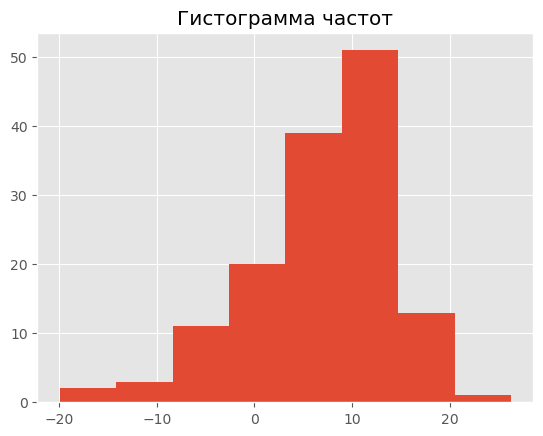

In [57]:
n = 1 + int(np.log2(len(x)))
freq = plt.hist(x, bins = n)[0]
plt.title('Гистограмма частот')
plt.show()

## Пункт 6

Text(0.5, 1.0, 'Гистограмма относительных частот')

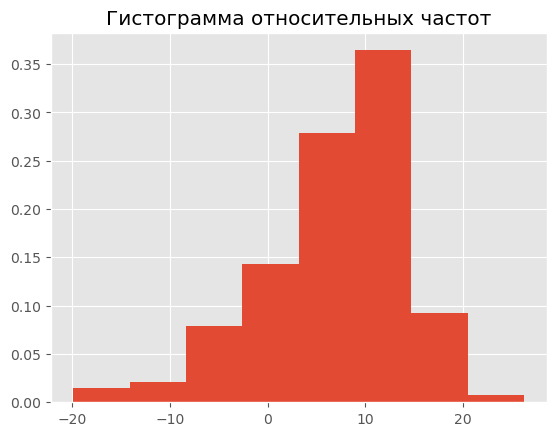

In [58]:
freq_rel = plt.hist(x, bins = n, weights = np.ones_like(x) / len(x))[0]
plt.title('Гистограмма относительных частот')

## Пункт 7

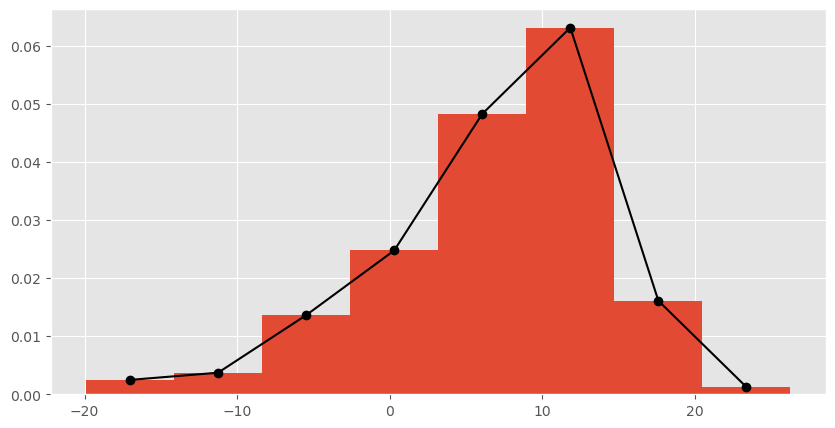

In [59]:
fig = plt.figure(figsize = (10, 5))

freq_dens, edges, p = plt.hist(x, bins = n, density = True)
poli = list()
for i in range(len(edges) - 1):
    poli.append((edges[i + 1] + edges[i]) / 2)
plt.plot(poli, freq_dens, marker = 'o', color = 'black')

## Пункт 8

In [60]:
c_freq = np.cumsum(freq)
print('Кумулятивные частоты: {0}'.format(c_freq))

Кумулятивные частоты: [  2.   5.  16.  36.  75. 126. 139. 140.]


## Пункт 9

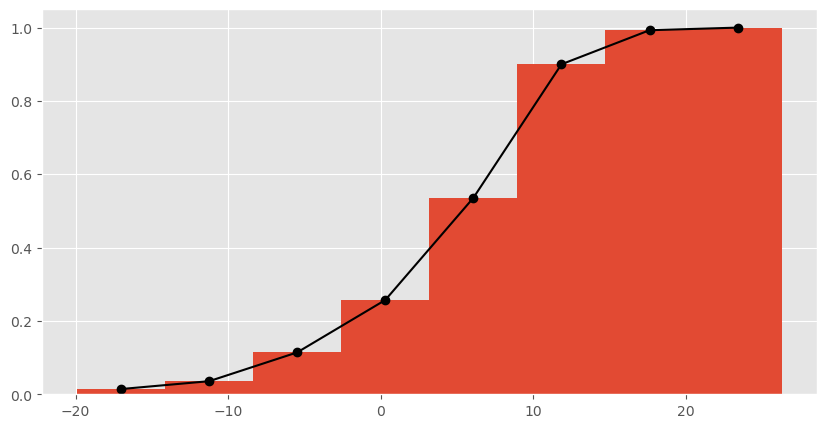

In [61]:
fig = plt.figure(figsize = (10, 5))

c_freq_rel, edges, p = plt.hist(x, bins = n, cumulative = True, weights = np.ones_like(x) / len(x))

poli = list()
for i in range(len(edges) - 1):
    poli.append((edges[i + 1] + edges[i]) / 2)
plt.plot(poli, c_freq_rel, marker = 'o', color = 'black')

## Пункт 10-11

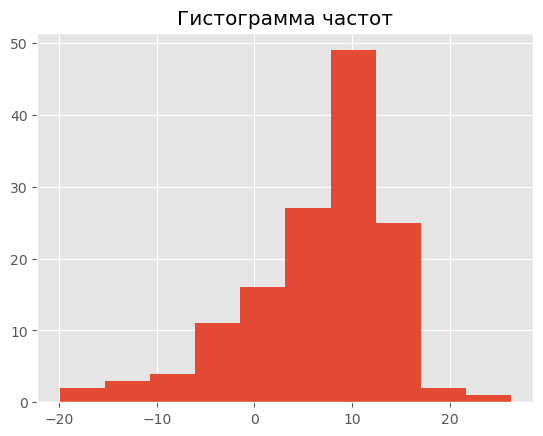

In [62]:
n = 10

freq = plt.hist(x, bins = n)[0]
plt.title('Гистограмма частот')
plt.show()

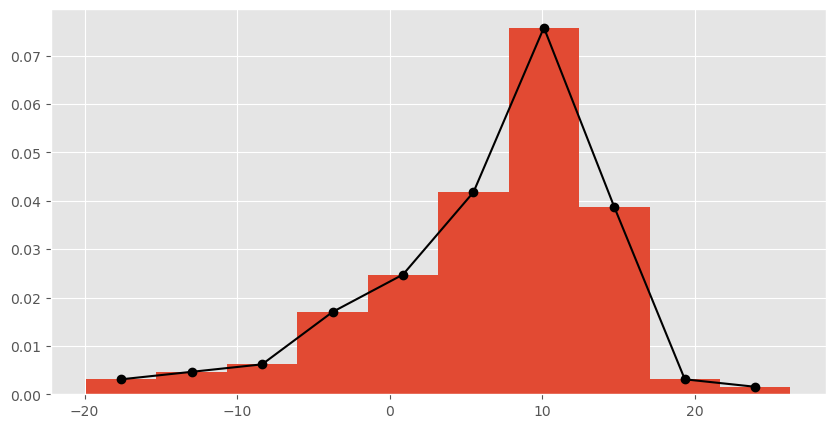

In [63]:
fig = plt.figure(figsize = (10, 5))

freq_dens, edges, p = plt.hist(x, bins = n, density = True)
poli = list()
for i in range(len(edges) - 1):
    poli.append((edges[i + 1] + edges[i]) / 2)
plt.plot(poli, freq_dens, marker = 'o', color = 'black')

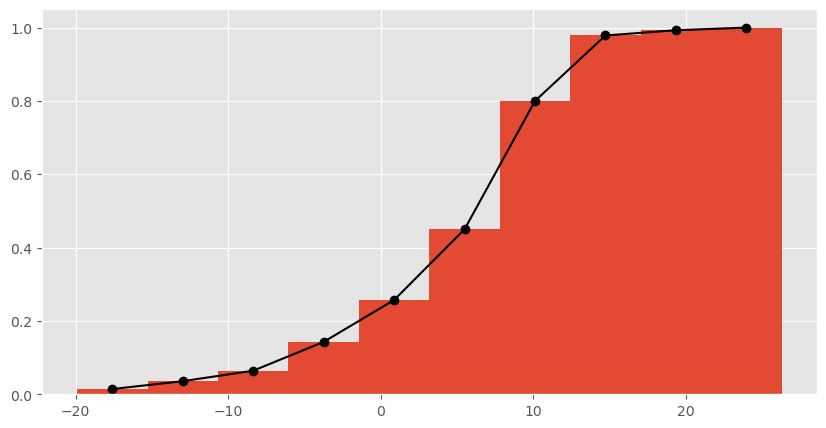

In [64]:
fig = plt.figure(figsize = (10, 5))

c_freq_rel, edges, p = plt.hist(x, bins = n, cumulative = True, weights = np.ones_like(x) / len(x))

poli = list()
for i in range(len(edges) - 1):
    poli.append((edges[i + 1] + edges[i]) / 2)
plt.plot(poli, c_freq_rel, marker = 'o', color = 'black')

### Корреляция

In [65]:
x2 = np.array(norm(loc = -2, scale = 2.08).rvs(size = 140))
x3 = np.array(norm(loc = 20, scale = 5.55).rvs(size = 140))

## Пункт 3

In [68]:
corr_12 = pearsonr(x, x2)
corr_13 = pearsonr(x, x3)
corr_23 = pearsonr(x2, x3)

print('Коэффициенты корреляции: {0}, {1}, {2}'.format(corr_12[0], corr_13[0], corr_23[0]))

t_crit_left = ss.t.ppf(0.025, len(x) - 2)
t_crit_right = ss.t.ppf(0.975, len(x) - 2)

t_12 = corr_12[0] / (np.sqrt(1 - corr_12[0] ** 2)) * np.sqrt(len(x) - 2)
t_13 = corr_13[0] / (np.sqrt(1 - corr_13[0] ** 2)) * np.sqrt(len(x) - 2)
t_23 = corr_23[0] / (np.sqrt(1 - corr_23[0] ** 2)) * np.sqrt(len(x) - 2)

if t_12 > t_crit_left and t_12 < t_crit_right:
    print('H0 не отвергается')
else:
    print('H0 отвергается в пользу альтернативной гипотезы')

if t_13 > t_crit_left and t_13 < t_crit_right:
    print('H0 не отвергается')
else:
    print('H0 отвергается в пользу альтернативной гипотезы')

if t_23 > t_crit_left and t_23 < t_crit_right:
    print('H0 не отвергается')
else:
    print('H0 отвергается в пользу альтернативной гипотезы')

Коэффициенты корреляции: 0.19347017720669737, 0.11375423944705004, 0.024381301511108622
H0 отвергается в пользу альтернативной гипотезы
H0 не отвергается
H0 не отвергается


## Пункт 4

In [69]:
import statistics

print('Выборочные ковариации: {0}, {1}, {2}'.format(statistics.covariance(x, x2), statistics.covariance(x, x3), statistics.covariance(x2, x3)))

Выборочные ковариации: 2.854104577457319, 4.602241177063924, 0.26255321965444234


## Пункт 5

In [75]:
corr_12 = pearsonr(x, x2)
corr_13 = pearsonr(x, x3)
corr_23 = pearsonr(x2, x3)

cor_mat = list()
cor_mat.append([1, corr_12[0], corr_13[0]])
cor_mat.append([corr_12[0], 1, corr_23[0]])
cor_mat.append([corr_13[0], corr_23[0], 1])
cor_mat

[[1, 0.19347017720669737, 0.11375423944705004],
 [0.19347017720669737, 1, 0.024381301511108622],
 [0.11375423944705004, 0.024381301511108622, 1]]